# 決定木とランダムフォレスト

- ノンパラメトリックモデル

# 1. 決定木

## 1-1.理論

- 決定木とは  
    ある特徴量の値としきい値の大小関係を判断する過程を表現したアルゴリズム

- 手法  
    - ボトムアップ  
        １つの学習データから識別規則をつくる  →　他の学習データにも当てはまるような識別規則にする
    - トップダウン（分割統治法）　※現在の主流  
        根ノード（分類のスタート）ですべての学習データを誤りが少なく２分割できる特徴軸を探して、特徴空間を２分割　→　分割したデータを同様に２分割する（繰り返していく）


- トップダウン手法で検討すべきこと
    1. 特徴空間分割規則を構成するための特徴軸としきい値の選択 
    1. 終端ノードの決定（どこまで分割していくか？）
    3. 終端ノードに対する多数決によるクラスの割当


- 特徴  
    - 過学習しやすい　→　ランダムフォレスト

### 回帰
- 分割条件（ノード）ごとに平均二乗誤差（MSE）が最小になるように決定木を作成する  

    - $MSE(t)=\displaystyle \frac{1}{N_{t}} \sum_{i \in D_{t}}^{}(y^{(i)}-\hat{y_{t}})^{2}$  
        $N_{t}$：訓練データの数  
        $D_{t}$：訓練データの集合  
        $y^{(i)}$：訓練データの正解
        
        
- $\hat{y_{t}}$は決定木の分割条件$t$に含まれる集合$D_{t}$の平均になる

    - $\hat{y_{t}}=\displaystyle \frac{1}{N_{t}} \sum_{i \in D_{t}}^{}y^{(i)}$

### 分類

- aaaa

## 1-2. コード

### 回帰

- [class sklearn.tree.DecisionTreeRegressor(*, criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort='deprecated', ccp_alpha=0.0)](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)  
    
    - 重要なパラメータ
    
        - criterion : {“mse”, “friedman_mse”, “mae”}, default=”mse”: 不純度の指標
        - max_depth : int, default=None : 決定木の深さ
        - random_state : 乱数のシード

In [54]:
# ライブラリのインポート
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [55]:
# ボストンデータセットの読み込み
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [56]:
df = pd.DataFrame(boston.data, columns=boston.feature_names) # 説明変数の読み込み
df['MEDV'] = boston.target # 目的変数の読み込み
df.head() # データを確認

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [57]:
df.shape

(506, 14)

In [58]:
# 説明変数と目的変数に分割
X = boston.data[:, [12]] # LSTATのみ特徴量にする
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('X_trainの形状', X_train.shape, 'y_trainの形状', y_train.shape)
print('X_testの形状', X_test.shape, 'y_testの形状', y_test.shape)

X_trainの形状 (404, 1) y_trainの形状 (404,)
X_testの形状 (102, 1) y_testの形状 (102,)


In [59]:
# モデルを作成
model = DecisionTreeRegressor(criterion='mse', max_depth=3, random_state=0)

In [60]:
# モデルの訓練
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [61]:
# trainデータの予測とMSE
y_train_pred = model.predict(X_train)
print('MSE train : %.2f' % (mean_squared_error(y_train_pred, y_train)))

MSE train : 22.45


In [62]:
# testデータの予測とMSE
y_test_pred = model.predict(X_test)
print('MSE test : %.2f' % (mean_squared_error(y_test_pred, y_test)))

MSE test : 39.42


In [63]:
# y_test_pred.reshape(-1, 1)
# y_test_pred.shape

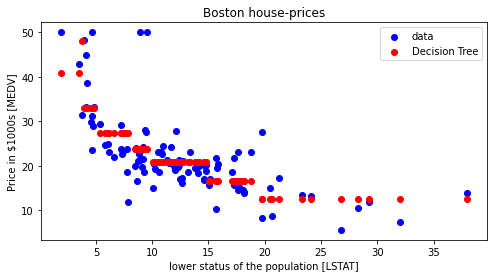

In [64]:
# 散布図と決定木回帰のプロット
plt.figure(figsize=(8, 4))
plt.scatter(X_test, y_test, color='blue', label='data')
plt.scatter(X_test, y_test_pred, color='red', label='Decision Tree')
plt.ylabel('Price in $1000s [MEDV]')
plt.xlabel('lower status of the population [LSTAT]')
plt.title('Boston house-prices')
plt.legend(loc='upper right')
plt.show()

### 分類

# 2. ランダムフォレスト

## 2-1. 理論

- 複数の決定木を作成し、複数の予測を使って精度を向上させるアンサンブル手法

## 2-2. コード

### 回帰

- [class sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)

    - 重要なパラメータ  
    
        - n_estimators : int, default=100 : 決定木の数
        - criterion : {“mse”, “mae”}, default=”mse” : 不純度の指標
        - max_depth : int, default=None : 決定木の深さ
        - bootstrap : bool, default=True : 復元抽出の有無
        - n_jobsint, default=None : ツリー上で並行実行するジョブの数 : -1ですべてのツリーを使用
        - random_state : int or RandomState, default=None : 乱数の固定

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

%matplotlib inline

In [66]:
boston = load_boston()
X = boston.data
y = boston.target

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('X_trainの形状', X_train.shape, 'y_trainの形状', y_train.shape)
print('X_testの形状', X_test.shape, 'y_testの形状', y_test.shape)

X_trainの形状 (404, 13) y_trainの形状 (404,)
X_testの形状 (102, 13) y_testの形状 (102,)


In [68]:
# モデルの作成
model = RandomForestRegressor(bootstrap=True, n_estimators=1000, criterion='mse', max_depth=None, random_state=0, n_jobs=-1)

In [69]:
# モデルの訓練
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)

In [70]:
# trainデータの予測とMSE
y_train_pred = model.predict(X_train)
print('MSE train : %.2f' % (mean_squared_error(y_train_pred, y_train)))

MSE train : 1.38


In [71]:
# testデータの予測とMSE
y_test_pred = model.predict(X_test)
print('MSE test : %.2f' % (mean_squared_error(y_test_pred, y_test)))

MSE test : 18.84


In [72]:
# 特徴量重要度
importance = model.feature_importances_
importance

array([0.04127976, 0.00123856, 0.0075613 , 0.00087938, 0.02053643,
       0.40584637, 0.01357617, 0.03910201, 0.00384994, 0.0157941 ,
       0.0222856 , 0.00957269, 0.41847769])

In [73]:
# 特徴量重要性を降順にソートし、そのインデックスを取得
indices = np.argsort(importance)[::-1]
indices

array([12,  5,  0,  7, 10,  4,  9,  6, 11,  2,  8,  1,  3])

In [74]:
# feature_namesを並べ替え
names = [boston.feature_names[i] for i in indices]
names

['LSTAT',
 'RM',
 'CRIM',
 'DIS',
 'PTRATIO',
 'NOX',
 'TAX',
 'AGE',
 'B',
 'INDUS',
 'RAD',
 'ZN',
 'CHAS']

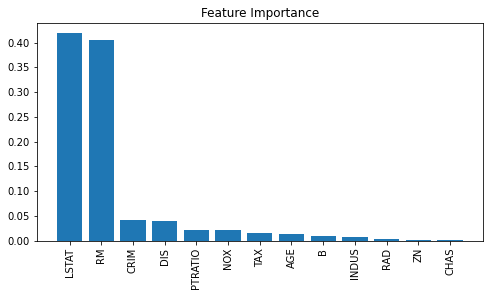

In [75]:
# feature importanceのplot
plt.figure(figsize=(8, 4))
plt.bar(range(X.shape[1]), importance[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.title('Feature Importance')
plt.show()

### 分類

# 3. 精度向上のポイント

# 4. 参照
- [sklearn.tree: Decision Trees](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree)